In [1]:
import cv2
import mediapipe as mp
import numpy as np
import uuid
import os
import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import joblib

In [4]:
# Carregar os dados
data = pd.read_csv('Exerc2.csv', sep = ',')
data = data[data['gesture'] != 0]

In [5]:
data.head()

,landmark_0_x,landmark_1_x,landmark_2_x,landmark_3_x,landmark_4_x,landmark_5_x,landmark_6_x,landmark_7_x,landmark_8_x,landmark_9_x,...,landmark_12_z,landmark_13_z,landmark_14_z,landmark_15_z,landmark_16_z,landmark_17_z,landmark_18_z,landmark_19_z,landmark_20_z,gesture
25,0.477052,0.699957,2.432086e-07,0.331913,0.636098,-0.007107,0.264269,0.557758,-0.020697,0.255887,...,0.798529,0.475283,-0.133103,0.842309,0.429080,-0.138542,0.878773,0.388451,-0.138041,1
26,0.479765,0.700400,2.715358e-07,0.334581,0.634418,-0.008940,0.270066,0.556704,-0.022687,0.265949,...,0.796665,0.475302,-0.133871,0.839103,0.428432,-0.140531,0.874789,0.386259,-0.140974,1
27,0.483889,0.700630,2.104167e-07,0.337923,0.633966,-0.007324,0.277579,0.555788,-0.016171,0.287426,...,0.791917,0.476098,-0.128650,0.831793,0.428261,-0.137563,0.866067,0.385292,-0.138961,1
28,0.488868,0.699024,2.581205e-07,0.336008,0.635997,-0.010618,0.280580,0.558244,-0.020027,0.298691,...,0.788736,0.475283,-0.122745,0.827606,0.427074,-0.129911,0.861595,0.384501,-0.129752,1
29,0.490368,0.701121,2.446540e-07,0.335605,0.637426,-0.009785,0.278678,0.558519,-0.017831,0.301024,...,0.787118,0.473966,-0.116769,0.824850,0.425572,-0.123017,0.858303,0.383244,-0.122206,1


In [6]:
X = data.drop(columns=['gesture'])
y = data['gesture']

In [12]:
#Converter rótulo
label_encoder = LabelEncoder()
#y = label_encoder.fit_transform(y)  #"Mão aberta" -> 0, "Mão fechada" -> 1

In [8]:
#divisão do dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
#treino do modelo
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
#Avaliação
y_pred = model.predict(X_test)
print("Precisao:", accuracy_score(y_test, y_pred))

Precisao: 1.0


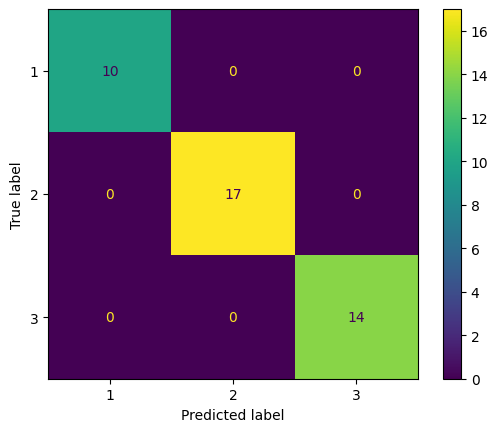

In [14]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()


In [16]:
#Salvar modelo
joblib.dump(model, 'Modelo_Exercicio2.pkl')

['Modelo_Exercicio2.pkl']